#### Muhammad Nizar_2009106059
#### POSTTEST 8 Kecerdasan Buatan / Artificial Intellegence
## _DNN_
### _Deep Neural Network_

#### Link Dataset
[Video Game Rating ESRB](https://www.kaggle.com/datasets/imohtn/video-games-rating-by-esrb "Video Game Rating ESRB Dataset")

#### *Import tensorflow, pandas, sklearn untuk split data, dan matplotlib untuk visualisasi hasil akurasi*

In [92]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### *Mengambil data dari dataset*

In [93]:
df = pd.read_csv('Video_games_esrb_rating.csv')

#### *Pre-Processing terlebih dahulu karena pada tensor.keras.utils tidak bisa menggunakan tipe data objek*

In [94]:
df.replace("RP", value=0, inplace=True)
df.replace("EC", value=1, inplace=True)
df.replace("E", value=2, inplace=True)
df.replace("ET", value=3, inplace=True)
df.replace("T", value=4, inplace=True)
df.replace("M", value=5, inplace=True)
df.replace("A", value=6, inplace=True)

#### *Inisilasisasikan bagian mana yang jadi label(y) dan record(x)*

In [95]:
X = df[['alcohol_reference', 'animated_blood', 'blood', 'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference', 'fantasy_violence', 'intense_violence',
    'language', 'lyrics', 'mature_humor', 'mild_blood', 'mild_cartoon_violence', 'mild_fantasy_violence', 'mild_language', 'mild_lyrics', 'mild_suggestive_themes',
    'mild_violence', 'no_descriptors', 'nudity', 'partial_nudity' , 'sexual_content', 'sexual_themes', 'simulated_gambling', 'strong_janguage', 'strong_sexual_content',
    'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol', 'violence']]
Y = df['esrb_rating']

#### *membagi data latih dan data testing menjadi 70:30*

In [96]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=.3)

#### *Inisilasisasikan bagian mana yang jadi label(y) dan record(x)*

In [97]:
num_class = 7
y_train = tf.keras.utils.to_categorical(y_train, num_class)
y_test = tf.keras.utils.to_categorical(y_test, num_class)

#### *Membuat model sequential dengan aktivasi relu, dan softmax biasa digunakan untuk klasifikasi yang classnya lebih dari 1*

In [98]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_dim=31),
    tf.keras.layers.Dense(num_class, activation='softmax')
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                512       
                                                                 
 dense_19 (Dense)            (None, 7)                 119       
                                                                 
Total params: 631
Trainable params: 631
Non-trainable params: 0
_________________________________________________________________


#### *mengoptimasi sebuah model dengan optimizer adam, dan loss menggunakan categorical crossentropy*

In [99]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

#### *melatih model telebih dahulu lalu mencoba data testing dengan epoch(iterasi) sebanyak 50, dan setiap langkah per-epoch(iterasi) sebanyak 50*

In [100]:
history = model.fit(
    x = x_train,  y = y_train,
    validation_data = (x_test, y_test),
    epochs = 50,
    steps_per_epoch = 50,
    verbose = 2 ## tampilan compile per epoch 1 default, 2 tidak melihatkan perjalanan 0 langsung 
)

Epoch 1/50
50/50 - 1s - loss: 1.8661 - accuracy: 0.2911 - val_loss: 1.7613 - val_accuracy: 0.3339 - 658ms/epoch - 13ms/step
Epoch 2/50
50/50 - 0s - loss: 1.6627 - accuracy: 0.3824 - val_loss: 1.5630 - val_accuracy: 0.4974 - 104ms/epoch - 2ms/step
Epoch 3/50
50/50 - 0s - loss: 1.4545 - accuracy: 0.5158 - val_loss: 1.3603 - val_accuracy: 0.5079 - 104ms/epoch - 2ms/step
Epoch 4/50
50/50 - 0s - loss: 1.2480 - accuracy: 0.6048 - val_loss: 1.1683 - val_accuracy: 0.6380 - 117ms/epoch - 2ms/step
Epoch 5/50
50/50 - 0s - loss: 1.0577 - accuracy: 0.6780 - val_loss: 0.9930 - val_accuracy: 0.6801 - 125ms/epoch - 3ms/step
Epoch 6/50
50/50 - 0s - loss: 0.8901 - accuracy: 0.7436 - val_loss: 0.8469 - val_accuracy: 0.7575 - 124ms/epoch - 2ms/step
Epoch 7/50
50/50 - 0s - loss: 0.7578 - accuracy: 0.8024 - val_loss: 0.7371 - val_accuracy: 0.7540 - 110ms/epoch - 2ms/step
Epoch 8/50
50/50 - 0s - loss: 0.6570 - accuracy: 0.8152 - val_loss: 0.6551 - val_accuracy: 0.7786 - 103ms/epoch - 2ms/step
Epoch 9/50
50/5

#### *Visulasisasikan Akurasi dari data Latih dan data Validasi atau hasil dari testing*
- Data Latih dan data testing mengalami kenaikan akurasi yang tinggi sekitar epoch(iterasi) ke-0 sampai 10 (NOTE : Karena kita melatih awalan 0 makanya mengalami kenaikan akurasi)
- Data Latih mempunyai akurasi yang lumayan stabil sekitar epoch(iterasi) ke-25 keatas
- Data Testing/Validasi mempunyai akurasi yang lumayan stabil sekitar epoch(iterasi) ke-26 keatas

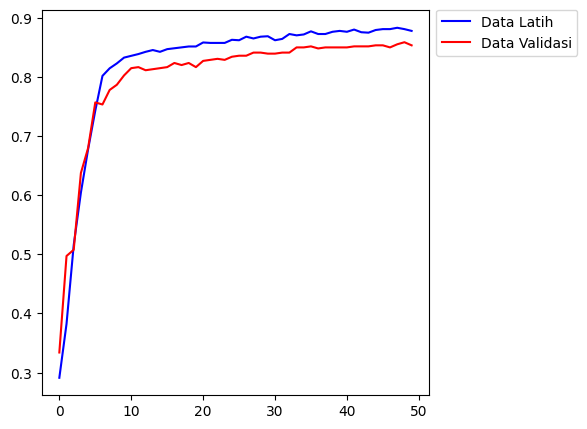

In [101]:
plt.figure(1, figsize=(5,5))
plt.plot(range(len(history.history['accuracy'])),
         history.history['accuracy'],
         color='b',
         label='Data Latih'
)
plt.plot(range(len(history.history['val_accuracy'])),
         history.history['val_accuracy'],
         color='r',
         label='Data Validasi',
         
)
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()